In [49]:
import os

import h5py
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import astropy.units as u
import astropy.io
import sunpy.cm
from sunpy.map import Map,MapMeta,MapCube
from sunpy.io.fits import get_header

from synthesizAR.util import EISCube

%matplotlib inline

In [130]:
test_cube = EISCube('/data/datadrive2/ar_viz/instr_refactor/Hinode_EIS/Si_VII_275.354/map_t000300.fits')

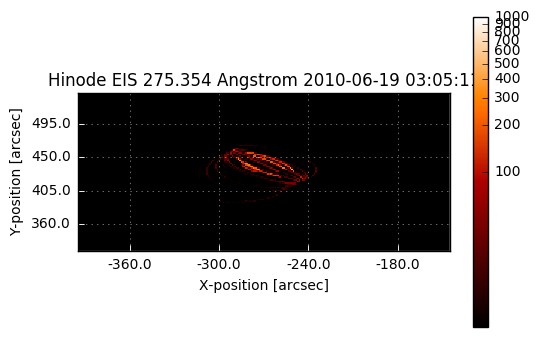

In [133]:
eis_plot = test_cube.integrated_intensity.plot(
    norm=matplotlib.colors.SymLogNorm(1e-3,vmin=10,vmax=1000),
)
plt.colorbar(eis_plot)

(-0.2, 0.2)

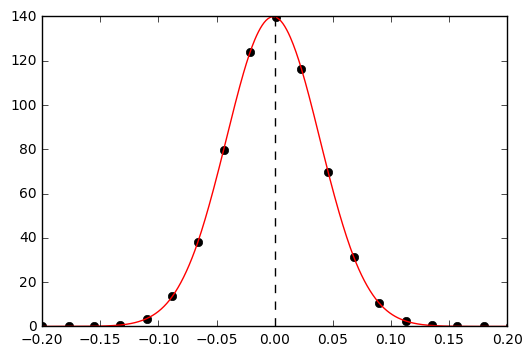

In [135]:
new_wvl = np.linspace(test_cube.wavelength.value[0],test_cube.wavelength.value[-1],500)
f_interp = scipy.interpolate.interp1d(test_cube.wavelength.value,test_cube.as_array()[53,125,:],kind='cubic')
plt.plot(test_cube.wavelength-test_cube.meta['wavelnth']*u.angstrom,test_cube.as_array()[53,125,:],'ko')
plt.plot(new_wvl-test_cube.meta['wavelnth'],np.where(f_interp(new_wvl)<0,0,f_interp(new_wvl)),'r')
plt.axvline(x=float(0.0),color='k',linestyle='--')
plt.xlim([-.2,.2])

/opt/anaconda3/envs/synthesizar_refactor/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


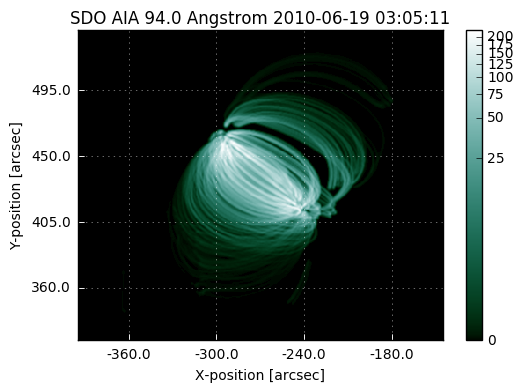

In [137]:
Map('/data/datadrive2/ar_viz/instr_refactor/SDO_AIA/94/map_t000100.fits').peek()